In [325]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [326]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [327]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


### Without Neural Network

In [328]:
# w = tf.Variable(tf.random_normal([1]))
# b = tf.Variable(tf.random_normal([1]))

# y_predicted = w * x_data + b # model

# loss = tf.reduce_mean(tf.square(y_predicted - y_data))
# optimizer = tf.train.GradientDescentOptimizer(0.001)
# train = optimizer.minimize(loss)

### With Neural Network

```
tf.matmul(_x_data, W) -> [506, 1]*[1, 5] = [506, 5]
tf.matmul(hidden, W_out) -> [506, 5]*[5, 1] = [506, 1]
```

In [329]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(x_data), 1])


W = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # node : 5
W_out = tf.Variable(tf.random_normal([5, 1], dtype=tf.float64))

hidden = tf.nn.sigmoid(tf.matmul(_x_data, W)) # First layer of NN
output = tf.matmul(hidden, W_out)

loss = tf.reduce_mean(tf.square(output - _y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [330]:
W1 = tf.Variable(tf.random_normal([1, 8], dtype=tf.float64)) # node : 8
W2 = tf.Variable(tf.random_normal([8, 10], dtype=tf.float64)) # node : 10
W_out2 = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1)) # First layer of NN
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2)) # Second layer of NN
output2 = tf.matmul(hidden2, W_out2)

loss2 = tf.reduce_mean(tf.square(output2 - _y_data))
optimizer2 = tf.train.AdamOptimizer(0.001)
train2 = optimizer2.minimize(loss2)

## Session Start

In [331]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables initialization
    
    for step in range(50001):
        sess.run(train)
        sess.run(train2)
        if step % 5000 == 0:
#             print(f'step {step}: w {sess.run(w)} b {sess.run(b)}')
            print(f'step {step}')
            print(f'loss {sess.run(loss)}')
            print(f'loss2 {sess.run(loss2)}')
            print()
            
#     w_out, b_out = sess.run([w, b])
    output = sess.run(output)
    output2 = sess.run(output2)
    

step 0
loss 600.4479683292336
loss2 1043.337528420012

step 5000
loss 75.13142875219059
loss2 26.230387797658594

step 10000
loss 65.18689884756165
loss2 26.116051193891174

step 15000
loss 57.92222938641374
loss2 26.079915956394604

step 20000
loss 52.74132680613537
loss2 26.065409994153708

step 25000
loss 47.959033273101504
loss2 26.058183363665325

step 30000
loss 50.76213311326262
loss2 26.053133230059075

step 35000
loss 59.408754524272965
loss2 26.04945686640481

step 40000
loss 45.67093137129396
loss2 26.05084931480665

step 45000
loss 57.7366389649989
loss2 26.045545527044926

step 50000
loss 43.655430058880924
loss2 26.044416411251614



In [286]:
# plt.figure(figsize = (10, 10))
# plt.plot(x_data, y_data, 'bo', label="Real data")
# plt.plot(x_data, x_data*w_out + b_out, 'ro', label='Prediction')
# plt.legend()
# plt.show()

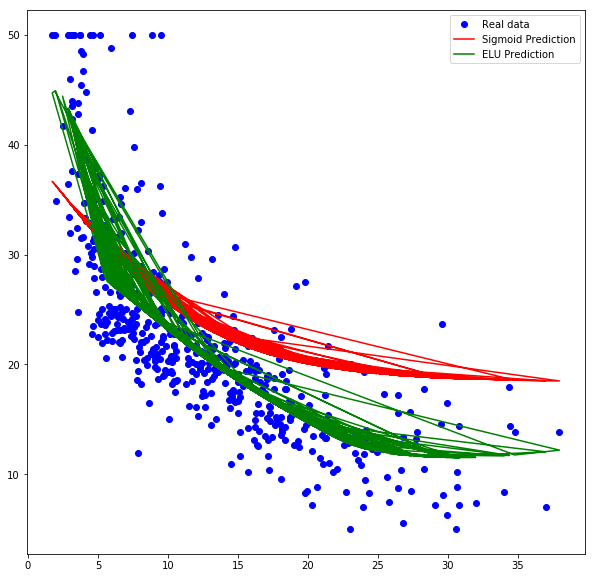

In [332]:
plt.figure(figsize = (10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, '-r', label='Sigmoid Prediction')
plt.plot(x_data, output2, '-g', label='ELU Prediction')
plt.legend()
plt.show()